In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:

import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, LeakyReLU
from keras.layers import Conv2DTranspose, Dropout, ReLU, Input, Concatenate, ZeroPadding2D
from keras.optimizers import Adam
from keras.utils import plot_model

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import tensorflow as tf

devices = tf.config.experimental.list_physical_devices("GPU")
for device in devices:
    if "Intel(R) HD Graphics 4000" in device.name:
        tf.config.experimental.set_memory_growth(device, enable=True)

devices = tf.config.list_physical_devices("GPU")
print(devices)
#devices = tf.config.experimental.list_physical_devices("GPU")
#tf.config.experimental.set_memory_growth(devices[0] ,enable=True)
#devices

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs:", len(physical_devices))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Num GPUs: 1


In [ ]:
BATCH_SIZE = 1
IMAGE_SIZE = 512

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf

def load(input_image, real_image):
    # Preprocess Images
    img_3D = '/content/drive/MyDrive/HPGM-master/layout/mask/'
    img_2D = '/content/drive/MyDrive/HPGM-master/layout/label/'
    D3_images = []
    D2_image = []

    for filename in os.listdir(img_3D):
        if  filename.endswith('.png'):
            image_path = os.path.join(img_3D, filename)
            image = cv2.imread(image_path)
            D3_images.append(image)
            break

    for filename in os.listdir(img_2D):
        if  filename.endswith('.png'):
            img_path = os.path.join(img_2D, filename)
            images = cv2.imread(img_path)
            D2_image.append(images)
            break

    #image = tf.io.read_file(image_file)
    #image = tf.image.decode_jpeg(image, channels=3)
    #w = tf.shape(image)[1]
    #w = w//2
    real_image = D3_images[:]
    input_image = D2_image[:]

    input_image = tf.cast(input_image,3)
    real_image = tf.cast(real_image, 3)
    return input_image, real_image

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

path_3D = "/content/drive/MyDrive/HPGM-master/layout/mask/"
path_2D = "/content/drive/MyDrive/HPGM-master/layout/label/"

x = load(os.path.join(path_3D,"01677.png"),os.path.join(path_2D,"*01677.png"))[0]
y = load(os.path.join(path_3D,"01677.png"),os.path.join(path_2D,"*01677.png"))[1]

In [ ]:
print(f"Data type of x: {x.dtype}")
print(f"Data type of y: {y.dtype}")

Data type of x: <dtype: 'int32'>
Data type of y: <dtype: 'int32'>


In [ ]:
# # Convert both x and y to float32
# x_normalized = tf.cast(x[0], dtype=tf.float32) / 255.0
# y_normalized = tf.cast(y[0], dtype=tf.float32) / 255.0

In [ ]:
# print(f"Data type of x: {x_normalized.dtype}")
# print(f"Data type of y: {y_normalized.dtype}")

In [ ]:
# Normalize the image data
x_normalized = x[0] / 255
y_normalized = y[0] /255

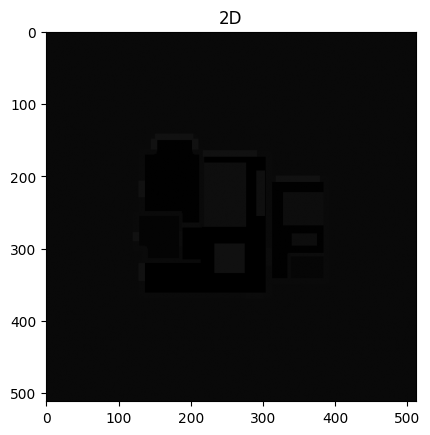

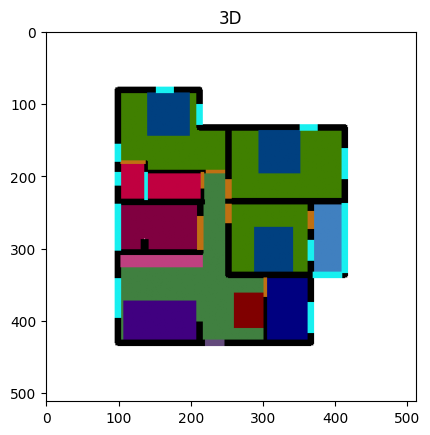

In [ ]:
# Display the image
plt.imshow(x_normalized)
plt.title("2D")
plt.show()

plt.imshow(y_normalized)
plt.title("3D")
# plt.show()

# fig, axes = plt.subplots(1,2, figsize = (16,5))
# axes[0].imshow(x)
# axes[1].imshow(y)

import imageio
import matplotlib.pyplot as plt

def print_rgb_image_as_3d(y_normalized):
    # Load the RGB image from file
    # rgb_image = imageio.imread(file_path)

    # Create a 3D plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Get the dimensions of the image
    height, width, _ = y_normalized.shape

    # Create the x, y, and z coordinate arrays
    x = range(width)
    y = range(height)
    x, y = np.meshgrid(x, y)
    z = np.zeros_like(x)

    # Flatten the RGB image into separate channels
    r = y_normalized[:,:,0].flatten()
    g = y_normalized[:,:,1].flatten()
    b = y_normalized[:,:,2].flatten()

    # Plot the RGB image as a scatter plot
    ax.scatter(x, y, z, c=[r, g, b], s=1)

    # Set labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('3D RGB Image')

    # Show the plot
    plt.show()

# Example usage
file_path = "/content/drive/MyDrive/HPGM-master/layout/mask/"
print_rgb_image_as_3d(y_normalized)

In [ ]:

def normalize(input_image, real_image):
    input_image = (input_image / 256.0) - 1
    real_image = (real_image / 256.0) - 1
    return input_image, real_image

In [ ]:

def resize(input_image, real_image):
    input_image = tf.image.resize(input_image, [IMAGE_SIZE, IMAGE_SIZE], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    real_image = tf.image.resize(real_image, [IMAGE_SIZE, IMAGE_SIZE], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return input_image, real_image

In [ ]:

import tensorflow as tf
import os
import numpy as np

import time
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, LeakyReLU
from keras.layers import Conv2DTranspose, Dropout, ReLU, Input, Concatenate, ZeroPadding2D
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from keras.utils import plot_model
BATCH_SIZE = 1
IMAGE_SIZE = 512

import os
import numpy as np
import cv2
import tensorflow as tf

def load(input_image, real_image):
    # Preprocess Images
    img_3D = '/content/drive/MyDrive/HPGM-master/layout/mask/'
    img_2D = '/content/drive/MyDrive/HPGM-master/layout/label/'
    D3_images = []
    D2_image = []

    for filename in os.listdir(img_3D):
        if  filename.endswith('.png'):
            image_path = os.path.join(img_3D, filename)
            image = cv2.imread(image_path)
            D3_images.append(image)
            break

    for filename in os.listdir(img_2D):
        if  filename.endswith('.png'):
            img_path = os.path.join(img_2D, filename)
            images = cv2.imread(img_path)
            D2_image.append(images)
            break

    #image = tf.io.read_file(image_file)
    #image = tf.image.decode_jpeg(image, channels=3)
    #w = tf.shape(image)[1]
    #w = w//2
    real_image = D3_images[:]
    input_image = D2_image[:]

 #   input_image = tf.cast(input_image, 3)
#    real_image = tf.cast(real_image, 3)
    return input_image, real_image


def normalize(input_image, real_image):
    input_image = (input_image / 256) - 1
    real_image = (real_image / 256) - 1
    return input_image, real_image


#augmentation
def random_jitter(input_image, real_image):
    #if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)
    return input_image, real_image



def resize(input_image, real_image):
    input_image = tf.image.resize_with_pad(input_image[0], IMAGE_SIZE, IMAGE_SIZE, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    real_image = tf.image.resize_with_pad(real_image[0], IMAGE_SIZE, IMAGE_SIZE, method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    return input_image, real_image



def load_train_images(input_image, real_image):
    input_image, real_image = load(input_image, real_image)
    input_image, real_image = resize(input_image, real_image)
    input_image, real_image = random_jitter(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)
    return input_image,real_image



# input_image = tf.reshape(input_image, [1])

In [ ]:

def load_train_image_pair(image_pair):
    image_3D, image_2D = image_pair
    return load_train_images(image_3D), load_train_images(image_2D)


In [ ]:
%cd /content/drive/MyDrive/HPGM-master/layout/mask/

# path_3D = "/content/drive/MyDrive/mask"
train_dataset_3D = tf.data.Dataset.list_files("*.png")

/content/drive/MyDrive/HPGM-master/layout/mask


In [ ]:
%cd /content/drive/MyDrive/HPGM-master/layout/label/

train_dataset_2D = tf.data.Dataset.list_files("*.png")

/content/drive/MyDrive/HPGM-master/layout/label


In [ ]:
print(type(train_dataset_3D))

<class 'tensorflow.python.data.ops.shuffle_op._ShuffleDataset'>


In [ ]:
train_dataset_3D,train_dataset_2D
elements3 = list(train_dataset_3D.as_numpy_iterator())
elements2 = list(train_dataset_2D.as_numpy_iterator())

# Then print the list.
print(elements3)
print(elements2)

[b'./01744.png', b'./01446.png', b'./01190.png', b'./01707.png', b'./01512.png', b'./01619.png', b'./00947.png', b'./01808.png', b'./00050.png', b'./00996.png', b'./00037.png', b'./01164.png', b'./00329.png', b'./00385.png', b'./00228.png', b'./01095.png', b'./01035.png', b'./00675.png', b'./01776.png', b'./00626.png', b'./01021.png', b'./00955.png', b'./00345.png', b'./01409.png', b'./01435.png', b'./01165.png', b'./00394.png', b'./00991.png', b'./01008.png', b'./00834.png', b'./00181.png', b'./01697.png', b'./01048.png', b'./00129.png', b'./01814.png', b'./00962.png', b'./00197.png', b'./01861.png', b'./01890.png', b'./00864.png', b'./01818.png', b'./01045.png', b'./01011.png', b'./00089.png', b'./01223.png', b'./01525.png', b'./00624.png', b'./00590.png', b'./00562.png', b'./01805.png', b'./00199.png', b'./00393.png', b'./01746.png', b'./01231.png', b'./00906.png', b'./01884.png', b'./01700.png', b'./00209.png', b'./01916.png', b'./00248.png', b'./01020.png', b'./01064.png', b'./002

In [ ]:
# create input pipeline
# train_dataset_3D = tf.data.Dataset.list_files(path_3D + "*.png")
# train_dataset_2D = tf.data.Dataset.list_files(path_2D + "*.png")

train_dataset = tf.data.Dataset.zip((train_dataset_3D, train_dataset_2D))
train_dataset = train_dataset.map(load_train_images)
train_dataset = train_dataset.shuffle(10).batch(BATCH_SIZE)

train_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None))>

In [ ]:

len(train_dataset) # number of batch = number of images in the data cause each image consider batch

2000

In [ ]:
#augmentation
def random_jitter(input_image, real_image):
    #if tf.random.uniform(()) > 0.5:
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)
    return input_image, real_image

In [ ]:

def load_train_images(input_image, real_image):
    input_image, real_image = load(input_image, real_image)
    input_image, real_image = resize(input_image, real_image)
    input_image, real_image = random_jitter(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)    return input_image,real_image

In [ ]:

def load_test_image(input_image, real_image):
    input_image, real_image = load(input_image, real_image)
    input_image, real_image = resize(input_image, real_image)
    input_image, real_image = normalize(input_image, real_image)
    return input_image, real_image

In [ ]:
# test_dataset_3D = tf.data.Dataset.list_files(path_3D + "*.png")
# test_dataset_2D = tf.data.Dataset.list_files(path_2D + "*.png")
test_dataset = tf.data.Dataset.zip((train_dataset_3D, train_dataset_2D))
test_dataset = test_dataset.map(load_train_images)

test_dataset = test_dataset.batch(BATCH_SIZE)

test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 3), dtype=tf.float32, name=None))>

In [ ]:

len(test_dataset) # number of batch = number of images in the data cause each image consider batch

2000

In [ ]:
# downsample block
def downsample(filters, size, batchnorm = True):
    init = tf.random_normal_initializer(0.,0.02)
    result = Sequential()
    result.add(Conv2D(filters, size, strides = 2, padding = "same", kernel_initializer = init, use_bias = False))
    if batchnorm == True:
        result.add(BatchNormalization())

    result.add(LeakyReLU())
    return result
down_model = downsample(3,4)
x = tf.cast(x, tf.float32)  # Cast x to float32
down_result = down_model(tf.expand_dims(x, axis = 0))
print(down_result.shape)

(1, 1, 256, 256, 3)


In [ ]:
# upsample block
def upsample(filters, size, dropout=False):
    init = tf.random_normal_initializer(0, 0.02)
    result = Sequential()
    result.add(Conv2DTranspose(filters, size, strides=2, padding="same", kernel_initializer=init, use_bias=False))
    result.add(BatchNormalization())
    if dropout == True:
        result.add(Dropout(0.5))
    result.add(ReLU())
    return result

up_model = upsample(3, 4)
up_result = up_model(down_result[0])
print(up_result.shape)


# def upsample(filters, size, dropout = False):
#     init = tf.random_normal_initializer(0, 0.02)
#     result = Sequential()
#     result.add(Conv2DTranspose(filters, size, strides = 2, padding = "same", kernel_initializer = init, use_bias = False))
#     result.add(BatchNormalization())
#     if dropout == True:
#         result.add(Dropout(0.5))
#     result.add(ReLU())
#     return result
# up_model = upsample(3,4)
# up_result = up_model(down_result)
# print(up_result.shape)


(1, 512, 512, 3)


In [ ]:

(1, 512, 512, 3)

def generator():
    inputs = Input(shape = [IMAGE_SIZE, IMAGE_SIZE, 3])
    down_stack = [
        downsample(64, 4, batchnorm=False),
        downsample(128, 4),
        downsample(256, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(512, 4),
        downsample(1024, 4)
    ]


    up_stack = [
        upsample(512, 4, dropout=True),
        upsample(512, 4, dropout=True),
        upsample(512, 4),
        upsample(512, 4),
        upsample(256, 4),
        upsample(128, 4),
        upsample(64, 4),
        upsample(32, 4),
    ]
    init = tf.random_normal_initializer(0., 0.02)
    last = Conv2DTranspose(3, 4, strides = 2, padding = "same", kernel_initializer = init, activation ="tanh")
    x = inputs
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)
    skips = reversed(skips[:-1])

    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = Concatenate()([x, skip])

    x = last(x)
    return Model(inputs = inputs, outputs = x)

In [ ]:

gen = generator()
gen.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, 256, 256, 64)         3072      ['input_1[0][0]']             
                                                                                                  
 sequential_3 (Sequential)   (None, 128, 128, 128)        131584    ['sequential_2[0][0]']        
                                                                                                  
 sequential_4 (Sequential)   (None, 64, 64, 256)          525312    ['sequential_3[0][0]']        
                                                                                              

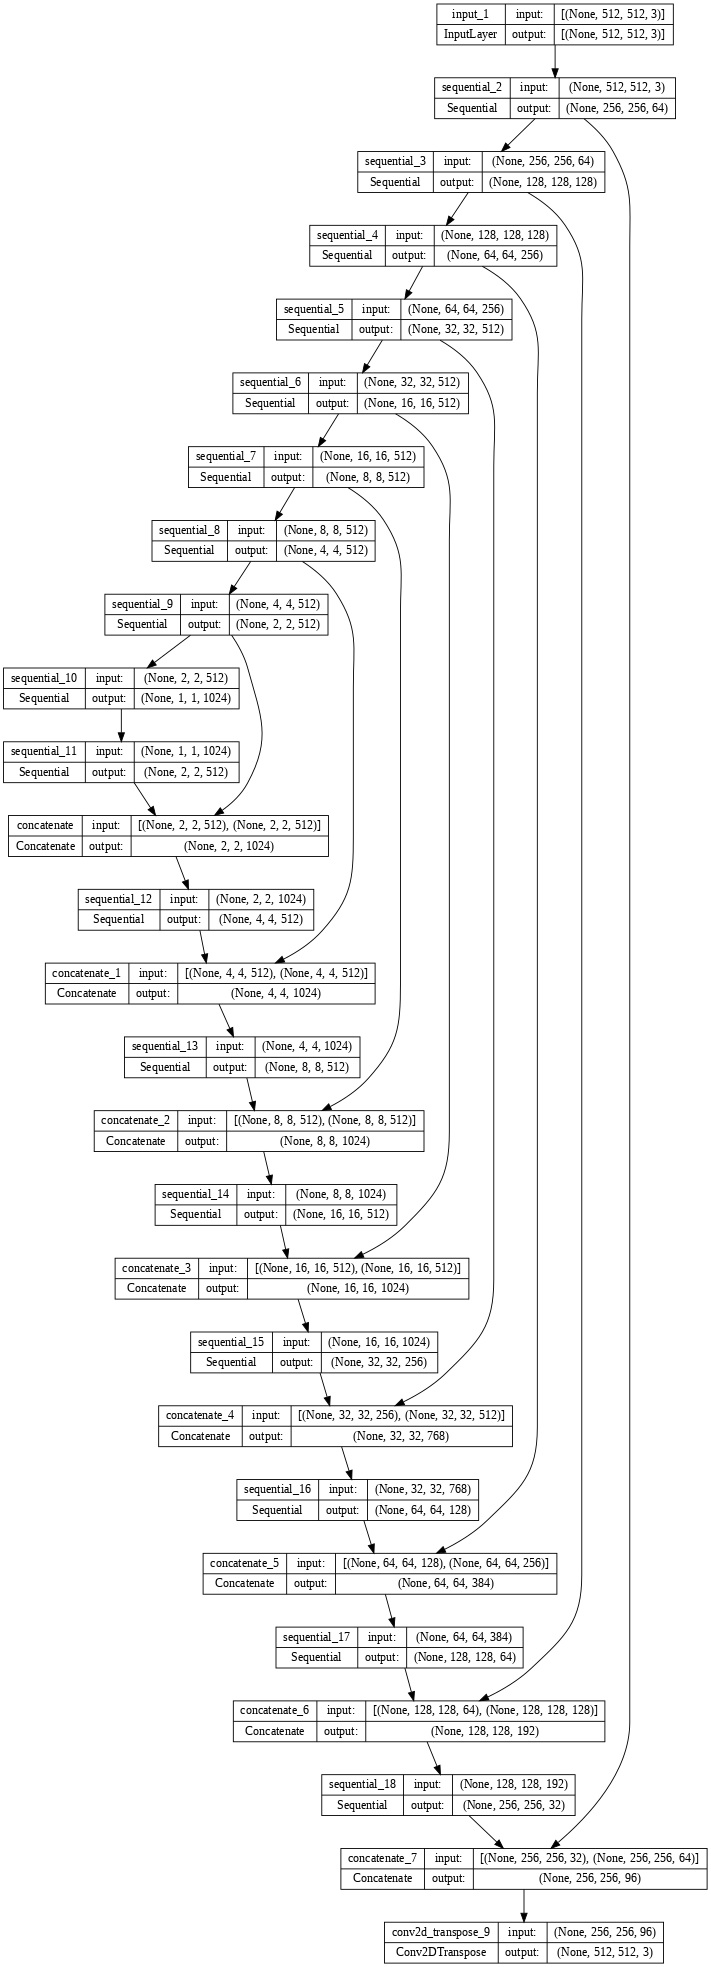

In [ ]:

plot_model(gen, show_shapes=True, dpi = 64)



In [ ]:

LAMBDA = 100


In [ ]:

from keras.losses import BinaryCrossentropy
loss_function = BinaryCrossentropy(from_logits=True)


In [ ]:

def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_function(tf.ones_like(disc_generated_output), disc_generated_output)
    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
    total_gen_loss = gan_loss + (LAMBDA * l1_loss)
    return total_gen_loss, gan_loss, l1_loss


In [ ]:
def discriminator():
    init = tf.random_normal_initializer(0., 0.02)

    inp = Input(shape = [IMAGE_SIZE, IMAGE_SIZE, 3], name = "input_image")
    tar = Input(shape = [IMAGE_SIZE, IMAGE_SIZE, 3], name = "target_image")
    x = Concatenate()([inp, tar])
    down1 = downsample(64,4,False)(x)
    down2 = downsample(128, 4)(down1)
    down3 = downsample(256, 4)(down2)
    down4 = downsample(512, 4)(down2)

    zero_pad1 = ZeroPadding2D()(down4)
    conv = Conv2D(512, 4, strides = 1, kernel_initializer = init, use_bias = False)(zero_pad1)
    leaky_relu = LeakyReLU()(conv)
    zero_pad2 = ZeroPadding2D()(leaky_relu)
    last = Conv2D(1, 4, strides = 1, kernel_initializer=init)(zero_pad2)
    return Model(inputs = [inp, tar], outputs = last)


In [ ]:

disc = discriminator()
disc.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_image (InputLayer)    [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 target_image (InputLayer)   [(None, 512, 512, 3)]        0         []                            
                                                                                                  
 concatenate_8 (Concatenate  (None, 512, 512, 6)          0         ['input_image[0][0]',         
 )                                                                   'target_image[0][0]']        
                                                                                                  
 sequential_19 (Sequential)  (None, 256, 256, 64)         6144      ['concatenate_8[0][0]'] 

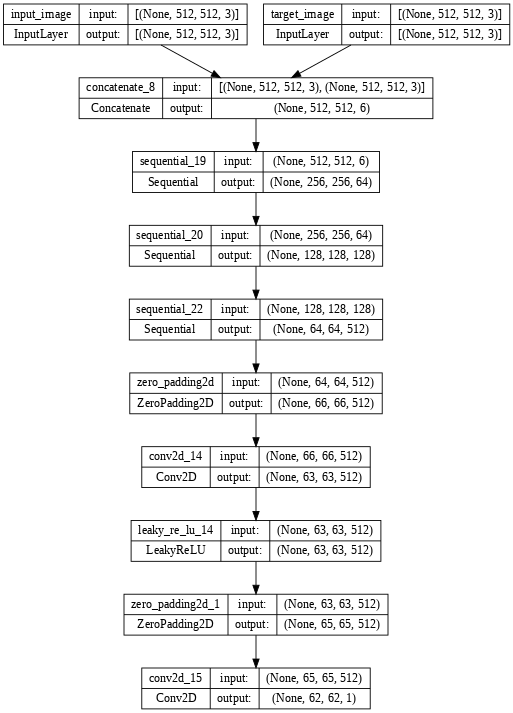

In [ ]:


plot_model(disc, show_shapes=True, dpi = 64)


In [ ]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_function(tf.ones_like(disc_real_output), disc_real_output)
    generated_loss = loss_function(tf.zeros_like(disc_generated_output), disc_generated_output)
    total_disc_loss = real_loss + generated_loss
    return total_disc_loss

In [ ]:

generator_optimizer = Adam(lr= 2e-4, beta_1=0.5)
discriminator_optimizer = Adam(lr = 2e-4, beta_1=0.5)

In [ ]:

def save_images(model, test_input, target, epoch):
    prediction = model(test_input, training= True)
    plt.figure(figsize = (15,15))
    display_list= [test_input[0], target[0], prediction[0]]
    title = ["Input Image", "Ground Truth", "Predicton Image"]
    for i in range(3):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis("off")
    plt.savefig(f"/content/output/epoch_{epoch}.png")
    plt.close()

# make sure output directory exists to save images
if not os.path.exists("output"):
    os.mkdir("output")

In [ ]:
epochs = 50


In [ ]:

@tf.function
def train_step(input_image, target, epoch):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = gen(input_image, training = True)

        disc_real_output = disc([input_image, target], training = True)
        disc_generated_output = disc([input_image, gen_output], training = True)
        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)
        generator_gradients = gen_tape.gradient(gen_total_loss, gen.trainable_variables)
        discriminator_gradients = disc_tape.gradient(disc_loss, disc.trainable_variables)
        generator_optimizer.apply_gradients(zip(generator_gradients, gen.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(discriminator_gradients, disc.trainable_variables))
        return gen_total_loss, disc_loss

In [ ]:

def fit(train_ds, epochs, test_ds):
    for epoch in range(epochs):
        start = time.time()
        for input_, target in test_ds.take(1):
            save_images(gen, input_, target, epoch)
        # Train
        print(f"Epoch {epoch}")
        for n, (input_, target) in train_ds.enumerate():
            gen_loss, disc_loss = train_step(input_, target, epoch)
        print("Generator loss {:.2f} Discriminator loss {:.2f}".format(gen_loss, disc_loss))
        print("Time take for epoch {} is {} sec\n".format(epoch+1, time.time() - start))

In [ ]:
import keras
keras.backend.clear_session()

In [ ]:
fit(train_dataset, epochs, test_dataset)

Epoch 0
Generator loss nan Discriminator loss nan
Time take for epoch 1 is 407.41535329818726 sec

Epoch 1
Generator loss nan Discriminator loss nan
Time take for epoch 2 is 389.266001701355 sec

Epoch 2
Generator loss nan Discriminator loss nan
Time take for epoch 3 is 390.5793237686157 sec

Epoch 3
Generator loss nan Discriminator loss nan
Time take for epoch 4 is 389.1907231807709 sec

Epoch 4
Generator loss nan Discriminator loss nan
Time take for epoch 5 is 389.5055458545685 sec

Epoch 5
Generator loss nan Discriminator loss nan
Time take for epoch 6 is 389.3505609035492 sec

Epoch 6
Generator loss nan Discriminator loss nan
Time take for epoch 7 is 388.98611664772034 sec

Epoch 7
Generator loss nan Discriminator loss nan
Time take for epoch 8 is 388.746693611145 sec

Epoch 8
Generator loss nan Discriminator loss nan
Time take for epoch 9 is 388.7755148410797 sec

Epoch 9
Generator loss nan Discriminator loss nan
Time take for epoch 10 is 389.3790295124054 sec

Epoch 10
Generator 

In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow
# Load the video
video_path = '/content/drive/MyDrive/القناص - رشا رزق _ أغنية البداية(360P).mp4'
capture = cv2.VideoCapture(video_path)

# Get the video's original dimensions
width = int(capture.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(capture.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Create a VideoWriter object to save the processed video
output_path = 'outputvid'
if not os.path.exists(output_path):
    os.mkdir(output_path)
fps = capture.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

# Process each frame of the video
while True:
    # Read a frame
    inn, frame = capture.read()
    # if not inn:
    #     break

    # Display the original video
    cv2_imshow(frame)

    # Resize the frame
    resized_frame = cv2.resize(frame, (224, 168))

    # Normalize the frame  (make pixels range between (0,3))
    normalized_frame = cv2.normalize(resized_frame, None, 0, 30, cv2.NORM_MINMAX)


    # save the processed frame to the outputvid folder
    video_writer.write(normalized_frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    # Display the processed video
    cv2_imshow(normalized_frame)

# Release the video capture and writer objects
capture.release()
video_writer.release()

# Close all OpenCV windows
cv2.destroyAllWindows()